# We import the dataset and get a glance of the data

In [1]:
import pandas as pd
path="Iris.csv"
Iris=pd.read_csv(path)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Here we can detect if there are some missing values

In [4]:
Iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
Iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data visualization

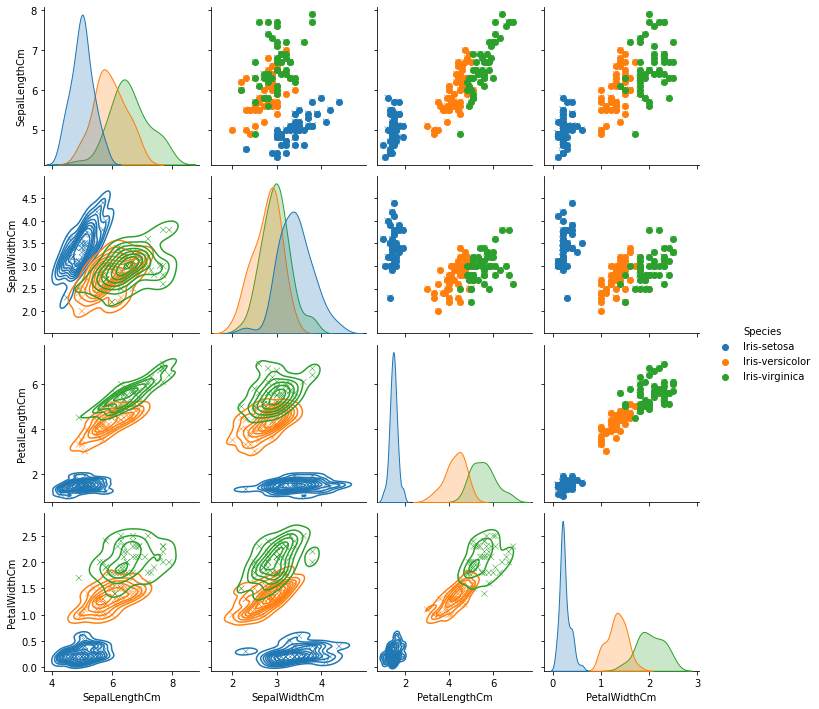

In [7]:
snsdata = Iris.drop(['Id'],axis=1)
g=sns.pairplot(snsdata,hue='Species',markers='x')
g=g.map_upper(plt.scatter)
g=g.map_lower(sns.kdeplot)

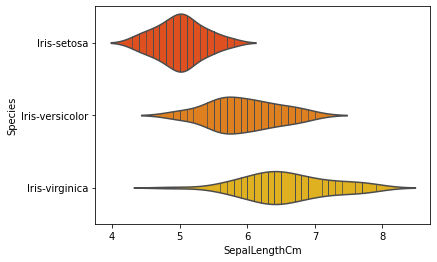

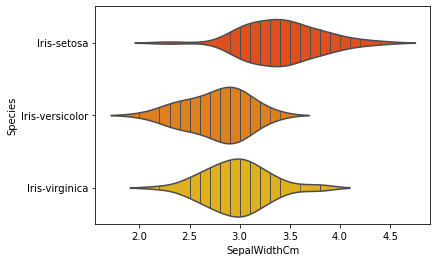

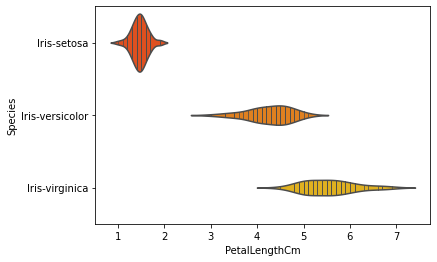

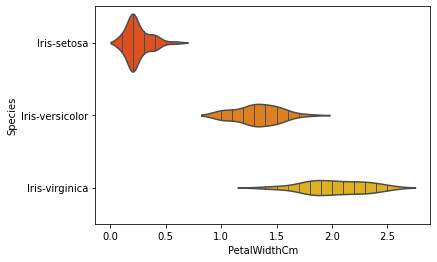

In [8]:
sns.violinplot(x='SepalLengthCm', y='Species', data=Iris, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=Iris, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=Iris, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=Iris, inner='stick', palette='autumn')
plt.show()

# We do ordinal encoding and linear regressión for the raw model to understand how to process the data

In [9]:
rows, col = Iris.shape
print("Rows : %s, column: %s" % (rows, col))

Rows : 150, column: 6


In [10]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = Iris.drop(['Id', 'Species'], axis=1).values # Input Feature Values
y = Iris.Species.replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [11]:
np.random.seed(0) # Let's set the zero for time being
theta = np.random.randn(1,5) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


In [12]:
iteration = 10000
learning_rate = 0.003 # If you are going by formula, this is actually alpha.
J = np.zeros(iteration) # 1 x 10000 maxtix

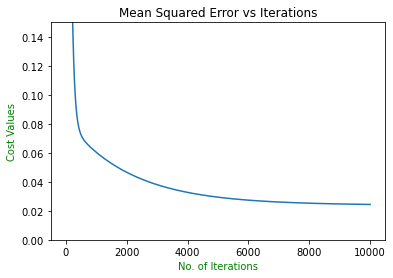

In [13]:
# Let's train our model to compute values of theta without scikitlearn methods
for i in range(iteration):
    J[i] = (1/(2 * rows) * np.sum((np.dot(X, theta.T) - y) ** 2 ))
    theta -= ((learning_rate/rows) * np.dot((np.dot(X, theta.T) - y).reshape(1,rows), X))

prediction = np.round(np.dot(X, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), J)
ax.set_ylim([0,0.15])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

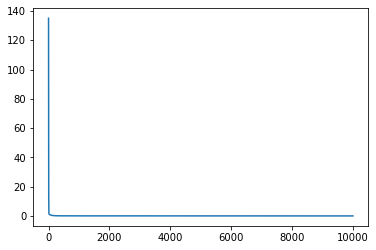

In [14]:
ax = sns.lineplot(x=np.arange(iteration), y=J)
plt.show()

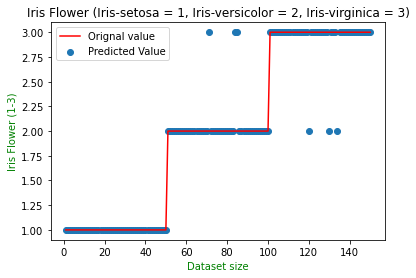

In [15]:
ax = plt.subplot(111)

ax.plot(np.arange(1, 151, 1), y, label='Orignal value', color='red')
ax.scatter(np.arange(1, 151, 1), prediction, label='Predicted Value')

plt.xlabel("Dataset size", color="Green")
plt.ylabel("Iris Flower (1-3)", color="Green")
plt.title("Iris Flower (Iris-setosa = 1, Iris-versicolor = 2, Iris-virginica = 3)")

ax.legend()
plt.show()

In [16]:
accuracy = (sum(prediction == y)/float(len(y)) * 100)[0]
print("The model predicted values of Iris dataset with an overall accuracy of %s" % (accuracy))

The model predicted values of Iris dataset with an overall accuracy of 96.0


# So now we can continue working our model by doing an stratified split instead on the ordinal encoded set

In [17]:
Iris_cat = Iris[["Species"]]
Iris_cat.head() #Types of species

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(Iris,Iris['Species']):
    strat_train_set = Iris.loc[train_index]
    strat_test_set = Iris.loc[test_index] #para que o como estratificariamos?

In [19]:
strat_train_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
8,9,4.4,2.9,1.4,0.2,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
9,10,4.9,3.1,1.5,0.1,Iris-setosa
89,90,5.5,2.5,4.0,1.3,Iris-versicolor
...,...,...,...,...,...,...
37,38,4.9,3.1,1.5,0.1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor


In [20]:
strat_test_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
38,39,4.4,3.0,1.3,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
20,21,5.4,3.4,1.7,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
84,85,5.4,3.0,4.5,1.5,Iris-versicolor


## And to check that the data is indeed stratified

In [21]:
strat_train_set['Species'].value_counts()/len(strat_train_set)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [22]:
strat_test_set['Species'].value_counts()/len(strat_test_set)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

# Prepare our data for Machine Learning Attributes

## Data cleaning

### First we choose the target column and the features to make the prediction

In [23]:
iris_strat = strat_train_set.drop(["Species"],axis=1) 
iris_labels = strat_train_set[["Species"]].copy()

In [24]:
iris_labels

,Species
8,Iris-setosa
106,Iris-virginica
76,Iris-versicolor
9,Iris-setosa
89,Iris-versicolor
...,...
37,Iris-setosa
2,Iris-setosa
33,Iris-setosa
52,Iris-versicolor


### Handle text and categorical attributes(We can do now Ordinal encoding and later One hot encoding)

#### Ordinal encoding on our data

In [25]:
#FIRST PART OF PIPELINE
from sklearn.preprocessing import OrdinalEncoder #encoding the column
oe = OrdinalEncoder()
iris_labels_oe = oe.fit_transform(iris_labels)
iris_labels_oe[:10]

array([[0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [26]:
oe.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

### And now we do One hot encoding 

In [27]:
from sklearn.preprocessing import OneHotEncoder
#Transform dataframe into digits (droping the text and concatenating the encoded column)
ohe = OneHotEncoder()
iris_labels_ohe = ohe.fit_transform(iris_labels).toarray()
iris_labels_ohe

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

In [28]:
ohe.categories_

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]

### Estos son algunos posibles comandos utiles

In [29]:
#iris_final = Iris.drop('Species',axis=1)
#target_df = pd.DataFrame(Iris_cat_encoded)
#Iris_df = pd.concat([Iris_df, target_df], axis= 1)
#Iris_df.columns = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
#Iris_df

#Iris_1hot=pd.DataFrame(Iris_cat_1hot.toarray())
#Iris_prepared=pd.concat([Iris,Iris_1hot],axis=1)
##Iris_prepared.drop('Species', axis=1,inplace=True)
#Iris_prepared.columns=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species','isSetosa',
#                       'isVersicolor','isVirginica']
#iris_prepared = Iris_prepared.drop(labels = ['Id','Species'],axis=1)
#iris_prepared

### Transformation pipelines

#### So now we can do a pipeline to transform our data

##### First we choose only the numerical attributes, dropping the categorical and the useless (Id) attributes in the original dataset

In [30]:
iris_num = iris_strat.drop(['Id'], axis = 1)

In [31]:
iris_num

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.1,1.5,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


#### Categorical features are not into the test set, so pipeline is not fully necessary but we can ilustrate a little how would work in this dataframe

#### We don't do transformations in the numerical attributes because it doesn't seems necessary but we'll use the SimpleImputer as an Identity transformer to ilustrate the use of pipelines

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median"))])

In [33]:
iris_strat

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,9,4.4,2.9,1.4,0.2
106,107,4.9,2.5,4.5,1.7
76,77,6.8,2.8,4.8,1.4
9,10,4.9,3.1,1.5,0.1
89,90,5.5,2.5,4.0,1.3
...,...,...,...,...,...
37,38,4.9,3.1,1.5,0.1
2,3,4.7,3.2,1.3,0.2
33,34,5.5,4.2,1.4,0.2
52,53,6.9,3.1,4.9,1.5


In [34]:
#from sklearn.compose import ColumnTransformer
#num_attribs = list(iris_num)
#cat_attribs = ["Species"]
#full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),
#                                                  ('cat',OrdinalEncoder(),cat_attribs),
#                                                 ])
full_pipeline = num_pipeline
iris_prepared = full_pipeline.fit_transform(iris_strat)

In [35]:
iris_prepared

array([[9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.07e+02, 4.90e+00, 2.50e+00, 4.50e+00, 1.70e+00],
       [7.70e+01, 6.80e+00, 2.80e+00, 4.80e+00, 1.40e+00],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [9.00e+01, 5.50e+00, 2.50e+00, 4.00e+00, 1.30e+00],
       [1.47e+02, 6.30e+00, 2.50e+00, 5.00e+00, 1.90e+00],
       [9.50e+01, 5.60e+00, 2.70e+00, 4.20e+00, 1.30e+00],
       [1.34e+02, 6.30e+00, 2.80e+00, 5.10e+00, 1.50e+00],
       [1.36e+02, 7.70e+00, 3.00e+00, 6.10e+00, 2.30e+00],
       [1.18e+02, 7.70e+00, 3.80e+00, 6.70e+00, 2.20e+00],
       [1.06e+02, 7.60e+00, 3.00e+00, 6.60e+00, 2.10e+00],
       [7.90e+01, 6.00e+00, 2.90e+00, 4.50e+00, 1.50e+00],
       [6.10e+01, 5.00e+00, 2.00e+00, 3.50e+00, 1.00e+00],
       [6.80e+01, 5.80e+00, 2.70e+00, 4.10e+00, 1.00e+00],
       [9.30e+01, 5.80e+00, 2.60e+00, 4.00e+00, 1.20e+00],
       [3.00e+01, 4.70e+00, 3.20e+00, 1.60e+00, 2.00e-01],
       [2.00e+01, 5.10e+00, 3.80e+00, 1.50e+00, 3.00e-01

In [36]:
pd.DataFrame(iris_prepared).drop(0,axis=1)

,1,2,3,4
0,4.4,2.9,1.4,0.2
1,4.9,2.5,4.5,1.7
2,6.8,2.8,4.8,1.4
3,4.9,3.1,1.5,0.1
4,5.5,2.5,4.0,1.3
...,...,...,...,...
115,4.9,3.1,1.5,0.1
116,4.7,3.2,1.3,0.2
117,5.5,4.2,1.4,0.2
118,6.9,3.1,4.9,1.5


##### Now we have ordinal encoded our data, we can choose an objective column 

In [37]:
#choosing objective column and removing Id column
X_train= pd.DataFrame(iris_prepared).drop(0, axis= 1)
y_train= pd.DataFrame(iris_labels_oe)

In [38]:
from sklearn.model_selection import train_test_split

## Then we separe into train and test data and train our model

In [39]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Training and Evaluating on the training Set with cross validation

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores_lr = cross_val_score(lr,X_train,y_train,scoring = "neg_mean_squared_error",cv=10)
lr_rmse_scores = np.sqrt(-scores_lr)
#lr.fit(X_train,y_train)
#pred = lr.predict(X_test)
#print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
#print('Mean Squared Error:', mean_squared_error(y_test, pred))
#print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))
#Ajustando el modelo sin hacer estratificacion

In [41]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

In [42]:
display_scores(lr_rmse_scores)

Scores:  [0.27301682 0.18471447 0.1753704  0.23169486 0.17294979 0.26110016
 0.29820854 0.17912819 0.19676079 0.16049335]
Mean:  0.21334373686895147
Standard deviation:  0.046381561984879326


In [43]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, n_splits=5)

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
scores_tree = cross_val_score(tree_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=kf)
tree_rmse_scores = np.sqrt(-scores_tree)

In [45]:
display_scores(tree_rmse_scores)

Scores:  [0.20412415 0.20412415 0.         0.28867513 0.20412415]
Mean:  0.18020951405812147
Standard deviation:  0.09587073437500299


In [46]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
scores_forest = cross_val_score(forest_reg,X_train,y_train.values.ravel(),scoring="neg_mean_squared_error",cv=kf)
forest_rmse_scores = np.sqrt(-scores_forest)

In [47]:
display_scores(forest_rmse_scores)

Scores:  [0.17174351 0.1883149  0.26100766 0.00353553 0.09073772]
Mean:  0.14306786400987132
Standard deviation:  0.08830299893540594


In [48]:
from sklearn.svm import SVR
svr_reg = SVR()
scores_svr = cross_val_score(svr_reg, X_train, y_train.values.ravel(),scoring="neg_mean_squared_error",cv=10)
svr_rmse_scores = np.sqrt(-scores_svr)

In [49]:
display_scores(svr_rmse_scores)

Scores:  [0.24147631 0.18200791 0.14754513 0.21062857 0.1676747  0.26062508
 0.22534898 0.17848446 0.1617808  0.12337422]
Mean:  0.18989461683546255
Standard deviation:  0.04128598107151404


#### So in our naive supossition we see that linear regression seems like a promising model and the svr seems ok althoug worse than lr

# Fine tune youre model

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'fit_intercept': [True,False]},
]

grid_search_lr = GridSearchCV(lr,param_grid,cv=10,scoring="neg_mean_squared_error",return_train_score=True)
grid_search_lr.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
grid_search_lr.best_params_

{'fit_intercept': False}

In [52]:
param_grid_svr = {'kernel':('linear','rbf'), 'C':[1,5,10], 'gamma':('auto','scale') }
grid_search_svr = GridSearchCV(svr_reg, param_grid_svr, cv=5, scoring='neg_mean_squared_error',
                               return_train_score=True)
grid_search_svr.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 5, 10], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'rbf')},
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
grid_search_svr.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

### We can also check correlation matrix

In [54]:
corr =pd.concat([X_train,y_train],join="inner",axis=1) 
corr.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
corr_matrix = corr.corr()
corr_matrix["Species"]

SepalLengthCm    0.792204
SepalWidthCm    -0.388647
PetalLengthCm    0.951013
PetalWidthCm     0.959387
Species          1.000000
Name: Species, dtype: float64

In [64]:
final_model_lr = grid_search_lr.best_estimator_

In [74]:
strat_test_set
X_test = strat_test_set.drop(labels=["Id","Species"],axis=1)
y_test = strat_test_set[["Species"]].copy()
X_test_prepared = pd.DataFrame(full_pipeline.fit_transform(X_test))
y_test_oe = oe.fit_transform(y_test)

In [75]:
final_predictions = final_model_lr.predict(X_test_prepared)

final_mse = mean_squared_error(y_test_oe,final_predictions)
final_rmse = np.sqrt(final_mse)

In [80]:
y_test_oe

array([[0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.]])

In [76]:
final_predictions

array([-0.03854419,  1.58942176,  0.86656724,  0.86318242, -0.04633478,
        1.39705493, -0.13989058, -0.04237409,  1.7475601 ,  1.37006344,
        1.80188933,  1.87917287,  1.99823328,  1.28947164, -0.05552985,
       -0.07277268, -0.20055697,  1.00046206,  1.30335192,  1.57556376,
       -0.09633623,  2.06134595,  1.18389097,  1.50528091,  1.97102775,
        1.50495694,  1.19964165, -0.01787342,  1.68713001, -0.09122822])

In [77]:
final_rmse #final prediction

0.2408768898032029

In [79]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test_oe)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([[0.79417126, 0.94455422, 1.04975768, 1.04933371, 0.79123419,
        0.99738207, 0.75495378, 0.79272893, 0.89567125, 1.00406384,
        0.87786964, 0.85166183, 0.80917277, 1.02258667, 0.78775155,
        0.78117325, 0.73036019, 1.05839093, 1.01956701, 0.94862186,
        0.77208123, 0.78553963, 1.04256988, 0.96866761, 0.81911638,
        0.96875765, 1.03997485, 0.80190436, 0.91487264, 0.77406234],
       [1.40276308, 1.30624254, 1.22329925, 1.22366295, 1.40442184,
        1.26636538, 1.42425315, 1.40357867, 1.34023329, 1.26107417,
        1.35196048, 1.36862134, 1.39416344, 1.24610142, 1.40637823,
        1.41004277, 1.43701992, 1.21583753, 1.24857333, 1.30329153,
        1.41504163, 1.40761491, 1.22943088, 1.28846238, 1.38834456,
        1.28839469, 1.23162679, 1.39835677, 1.32720017, 1.41395889]])

In [56]:
#feature_importances = grid_search_lr.best_estimator_.feature_importances
#feature_importances

In [38]:
#train_set, test_set = split_train_test_by_id(Iris_prepared, 0.2, "Id") #split data by id

In [39]:
#we could also use the sklearn function
#train_set, test_set = train_test_split(Iris_prepared, test_size=0.2, random_state=42)

In [164]:
#import sqlite3
#conn = sqlite3.connect('test_set_database')
#c = conn.cursor()
#c.execute('''CREATE TABLE IF NOT EXISTS test_set
#            ([Id] INTEGER PRIMARY KEY, [SepalLengthCm] FLOAT, [SepalWidthCm] FLOAT, [PetalLengthCm] FLOAT,
#            [PetalWidthCm] FLOAT, [Species] TEXT)''')
#conn.commit()

In [166]:
#train_set.to_sql('test_set',conn,if_exists='replace',index=False)

In [167]:
#c.execute('''select (select count(Species) from test_set where Species='Iris-setosa')*1.0/count(*) from test_set ''')
#print(c.fetchone()) #puede que haya borrado la columna de species jsjsjs

In [168]:
#iris_prepared.plot(kind="scatter",x="isSetosa",y="SepalWidthCm")#¿Este tipo de gráfica me sirve?

In [81]:
#from pandas.plotting import scatter_matrix
#attributes = ["SepalWidthCm","PetalLengthCm","PetalWidthCm","isSetosa"]
#scatter_matrix(iris_prepared[attributes],figsize=(12,8)) #parece tampoco servir mucho aqui

In [82]:
#preparation_and_feature_selection_pipeline = Pipeline([('preparation',preparation_pipeline),
#                                                       ('feature_selection',TopFeatureSelection(feature_importances,k))])